Generated dataset with 10 points (5 positive, 5 negative)
Perceptron converged after 2 iterations!
Perceptron accuracy: 100.00%

Dot Product Analysis:
------------------------------------------------------------
  Point    |  True Label  |   Dot Product   |  Prediction  |  Correct? 
------------------------------------------------------------
    0      |     1.0      |     1.7335      |      1       |     ✓     
    1      |     1.0      |     1.6521      |      1       |     ✓     
    2      |     1.0      |     0.5022      |      1       |     ✓     
    3      |     1.0      |     1.3030      |      1       |     ✓     
    4      |     1.0      |     1.6572      |      1       |     ✓     
    5      |     -1.0     |     -0.8937     |      -1      |     ✓     
    6      |     -1.0     |     -1.0253     |      -1      |     ✓     
    7      |     -1.0     |     -1.7266     |      -1      |     ✓     
    8      |     -1.0     |     -1.1686     |      -1      |     ✓     
    9  

<ipython-input-1-611de4add974>:150: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dot_product = float(np.dot(X_with_bias[i], self.W))


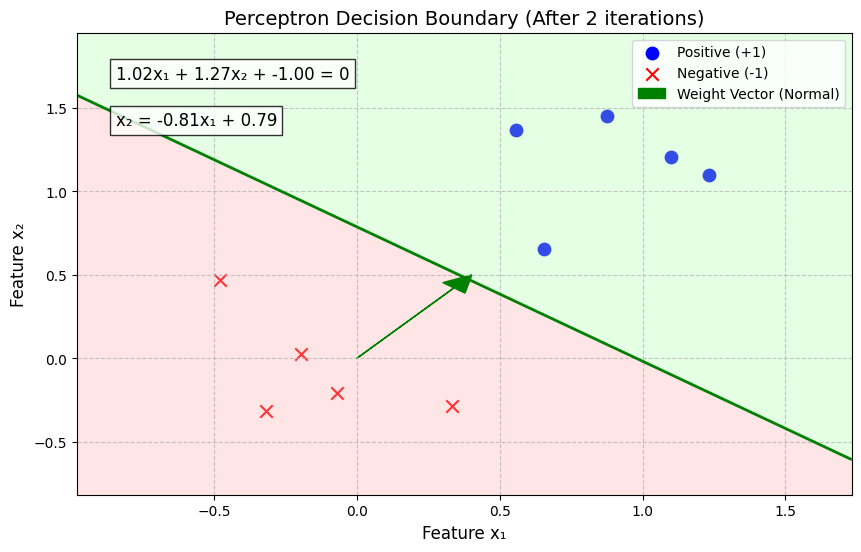

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self):
        """Initialize the Perceptron model"""
        self.W = None
        self.iterations = 0
    
    def model(self, X):
        """Apply the perceptron model to a single data point"""
        return 1 if np.dot(X, self.W) >= 0 else -1
    
    def train(self, X, y, max_iterations=1000):
        """Train the perceptron model
        
        Args:
            X: Training features (n_samples, n_features)
            y: Target labels (+1 or -1)
            max_iterations: Maximum number of iterations to prevent infinite loops
                           for non-linearly separable data
        """
        # Add bias term to input features
        X_with_bias = np.insert(X, 0, 1, axis=1)
        y = np.reshape(y, (y.size, 1))
        
        # Initialize weights to zeros
        self.W = np.zeros((X_with_bias.shape[1], 1))
        
        # Track iterations and misclassifications
        self.iterations = 0
        converged = False
        
        while not converged and self.iterations < max_iterations:
            misclassified = 0
            self.iterations += 1
            
            for i in range(X_with_bias.shape[0]):
                # Calculate dot product
                dot_product = np.dot(X_with_bias[i], self.W)
                
                # Check if misclassified
                if y[i] * dot_product <= 0:
                    # Update the weight: W = W + y*X
                    self.W += (y[i] * X_with_bias[i]).reshape(-1, 1)
                    misclassified += 1
            
            # Check for convergence
            if misclassified == 0:
                converged = True
                print(f"Perceptron converged after {self.iterations} iterations!")
        
        if not converged:
            print(f"Warning: Perceptron did not converge after {max_iterations} iterations. Data might not be linearly separable.")
        
        return self
    
    def predict(self, X):
        """Predict labels for new data points"""
        # Add bias term to input features
        X_with_bias = np.insert(X, 0, 1, axis=1)
        predictions = []
        
        for i in range(X_with_bias.shape[0]):
            predictions.append(self.model(X_with_bias[i]))
            
        return np.array(predictions)
    
    def accuracy(self, X, y):
        """Calculate prediction accuracy"""
        predictions = self.predict(X)
        return np.mean(predictions == y)
    
    def plot_decision_boundary(self, X, y):
        """Visualize the decision boundary and data points"""
        # Add bias term to input features
        X_with_bias = np.insert(X, 0, 1, axis=1)
        
        # Create figure and set axis limits based on data
        plt.figure(figsize=(10, 6))
        min_x1, max_x1 = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        min_x2, max_x2 = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        plt.xlim(min_x1, max_x1)
        plt.ylim(min_x2, max_x2)
        
        # Plot positive points
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', s=80, label='Positive (+1)')
        
        # Plot negative points
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', s=80, label='Negative (-1)')
        
        # Create a grid of points to visualize decision boundary
        xx, yy = np.meshgrid(np.linspace(min_x1, max_x1, 100), np.linspace(min_x2, max_x2, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        grid_with_bias = np.insert(grid, 0, 1, axis=1)
        
        # Compute decision function values
        Z = grid_with_bias.dot(self.W).reshape(xx.shape)
        
        # Plot decision boundary (Z=0)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
        
        # Shade the positive and negative regions
        plt.contourf(xx, yy, Z, levels=[-1000, 0, 1000], colors=['#FFAAAA', '#AAFFAA'], alpha=0.3)
        
        # Show the weight vector (normal to decision boundary)
        if self.W is not None and self.W.shape[0] >= 3:
            # Scale the weight vector for better visualization
            scale = 0.2 * (max_x1 - min_x1)
            origin = np.array([0, 0])
            normal = scale * self.W[1:3].flatten() / np.linalg.norm(self.W[1:3])
            
            plt.arrow(origin[0], origin[1], normal[0], normal[1], 
                      head_width=0.1, head_length=0.1, fc='green', ec='green',
                      label='Weight Vector (Normal)')
        
        # Show equation of decision boundary
        if self.W is not None and self.W.shape[0] >= 3:
            equation = f"{self.W[1][0]:.2f}x₁ + {self.W[2][0]:.2f}x₂ + {self.W[0][0]:.2f} = 0"
            plt.text(min_x1 + 0.05*(max_x1-min_x1), max_x2 - 0.1*(max_x2-min_x2), 
                     equation, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            
            # Also show the equivalent form rewritten as x₂ = mx₁ + b
            if self.W[2][0] != 0:  # Avoid division by zero
                m = -self.W[1][0]/self.W[2][0]
                b = -self.W[0][0]/self.W[2][0]
                rewritten = f"x₂ = {m:.2f}x₁ + {b:.2f}"
                plt.text(min_x1 + 0.05*(max_x1-min_x1), max_x2 - 0.2*(max_x2-min_x2), 
                         rewritten, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
        
        # Add labels and title
        plt.xlabel('Feature x₁', fontsize=12)
        plt.ylabel('Feature x₂', fontsize=12)
        plt.title(f'Perceptron Decision Boundary (After {self.iterations} iterations)', fontsize=14)
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        plt.show()
    
    def show_dot_products(self, X, y):
        """Display dot products for all points with the weight vector"""
        X_with_bias = np.insert(X, 0, 1, axis=1)
        
        print("\nDot Product Analysis:")
        print("-" * 60)
        print(f"{'Point':^10} | {'True Label':^12} | {'Dot Product':^15} | {'Prediction':^12} | {'Correct?':^10}")
        print("-" * 60)
        
        for i in range(X.shape[0]):
            dot_product = float(np.dot(X_with_bias[i], self.W))
            prediction = 1 if dot_product >= 0 else -1
            correct = prediction == y[i]
            
            print(f"{i:^10} | {y[i]:^12} | {dot_product:^15.4f} | {prediction:^12} | {'✓' if correct else '✗':^10}")
        
        print("-" * 60)
        
        # Explain the relationship between dot product and classification
        print("\nExplanation:")
        print("• When dot product > 0: The point is classified as positive (+1)")
        print("• When dot product < 0: The point is classified as negative (-1)")
        print("• When dot product = 0: The point lies exactly on the decision boundary")
        
    def visualize_training(self, X, y):
        """Explain the weight vector as normal to decision boundary"""
        # Only works for 2D data
        if X.shape[1] != 2 or self.W is None or self.W.shape[0] < 3:
            print("Weight vector visualization only works for 2D data")
            return
        
        W_normal = self.W[1:3].flatten()
        W_normal_norm = np.linalg.norm(W_normal)
        
        print("\nWeight Vector Analysis:")
        print("-" * 60)
        print(f"Weight vector (with bias): {self.W.flatten()}")
        print(f"Weight vector (without bias): {W_normal}")
        print(f"Normalized weight vector: {W_normal/W_normal_norm}")
        print("-" * 60)
        
        print("\nGeometric Interpretation:")
        print("• The weight vector [w₁, w₂] is normal (perpendicular) to the decision boundary")
        print("• The decision boundary has the equation: w₀ + w₁x₁ + w₂x₂ = 0")
        
        if self.W[2][0] != 0:  # Avoid division by zero
            m = -self.W[1][0]/self.W[2][0]
            b = -self.W[0][0]/self.W[2][0]
            print(f"• This can be rewritten as: x₂ = {m:.4f}x₁ + {b:.4f}")
            print(f"• The slope of this line is {m:.4f}, and its normal vector is proportional to [{self.W[1][0]:.4f}, {self.W[2][0]:.4f}]")
        
        print("• Points on the positive side of this boundary are classified as +1")
        print("• Points on the negative side are classified as -1")


# Generate a linearly separable dataset with 10 points (5 positive, 5 negative)
def generate_dataset():
    np.random.seed(42)
    
    # Create positive points (in the top-right quadrant)
    positive_points = np.random.rand(5, 2) + np.array([0.5, 0.5])
    positive_labels = np.ones(5)
    
    # Create negative points (in the bottom-left quadrant)
    negative_points = np.random.rand(5, 2) - np.array([0.5, 0.5])
    negative_labels = np.ones(5) * -1
    
    # Combine into one dataset
    X = np.vstack((positive_points, negative_points))
    y = np.hstack((positive_labels, negative_labels))
    
    return X, y

# Main execution
if __name__ == "__main__":
    # Generate linearly separable dataset
    X, y = generate_dataset()
    print(f"Generated dataset with {len(X)} points ({np.sum(y == 1)} positive, {np.sum(y == -1)} negative)")
    
    # Initialize and train Perceptron
    perceptron = Perceptron()
    perceptron.train(X, y)
    
    # Calculate and display accuracy
    accuracy = perceptron.accuracy(X, y)
    print(f"Perceptron accuracy: {accuracy * 100:.2f}%")
    
    # Show dot products and their relationship to classification
    perceptron.show_dot_products(X, y)
    
    # Explain weight vector as normal to decision boundary
    perceptron.visualize_training(X, y)
    
    # Plot the decision boundary and data points
    perceptron.plot_decision_boundary(X, y)